In [1]:
import os, sys, shutil
import numpy as np
import dask
import xarray as xr
import xgcm
import xrft

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *
from mitequinox.dynamic import *
from mitequinox.plot import *

In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster(cores=12, walltime='12:00:00')
w = cluster.scale(60*12) # postprocessing

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

<Client: scheduler='tcp://10.135.39.58:57333' processes=216 cores=216>

_________

# Grid

In [15]:
grid = load_grd().drop(['hFacC','hFacW','hFacS','rA','rAw','rAs']).isel(face=face)
gridx = xgcm.Grid(grid, periodic=['X','Y'])
lat = grid['YG']
omega = 7.3/100000
f = 2*omega*np.sin(np.deg2rad(lat))
f_i = gridx.interp(f,'X')
f_j = gridx.interp(f,'Y')
print(f_j)

<xarray.DataArray 'mul-3795edd725ae0d6c0c64f8f77f036b23' (j: 4320, i_g: 4320)>
dask.array<shape=(4320, 4320), dtype=float32, chunksize=(4319, 4320)>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319


In [6]:
mbal_dir = '/work/ALT/swot/aval/syn/mbal/'
face_all = [1,2]

In [11]:
for face in face_all:
      
    # read grid for one face
    #grid = load_grd().drop(['hFacC','hFacW','hFacS','rA','rAw','rAs']).isel(face=face)
    #gridx = xgcm.Grid(grid, periodic=['X','Y'])
    
    # compute coriolis term
    #lat = grid['YG']
    #omega = 7.3/100000
    #f = 2*omega*np.sin(np.deg2rad(lat))
    #f_j = gridx.interp(f,'Y')

    # read u_gradp and u_coriolis_linear terms
    ds_u_gradp = xr.open_zarr(mbal_dir+'u_gradp_f%02d.zarr'%face) 
    ds_u_coriolis = xr.open_zarr(mbal_dir+'u_coriolis_linear_f%02d.zarr'%face)     
    #print(ds_u_gradp)
    #print(ds_u_coriolis)
    # compute meridional ageostrophic velocity
    v_a = (ds_u_coriolis['u_coriolis_linear'].isel(i_g=slice(0,None,4), j=slice(0,None,4)) - ds_u_gradp['u_gradp'].isel(i_g=slice(0,None,4), j=slice(0,None,4)))#/f_j # (f*SSV - g*dEta/dx)/f
    v_a = np.real(v_a).rename('v_a')
    v_a = v_a.chunk({'time':24, 'j':188, 'i_g':376})
    print(v_a)
    v_a.to_dataset().to_zarr(mbal_dir+'v_a_f%02d.zarr'% (face), mode='w')
    print('face=%d - already processed'%(face))

<xarray.DataArray 'v_a' (j: 1080, i_g: 1080, time: 8640)>
dask.array<shape=(1080, 1080, 8640), dtype=float32, chunksize=(188, 376, 24)>
Coordinates:
    dxC      (j, i_g) float32 dask.array<shape=(1080, 1080), chunksize=(188, 376)>
    dyG      (j, i_g) float32 dask.array<shape=(1080, 1080), chunksize=(188, 376)>
    f_j      (j, i_g) float32 dask.array<shape=(1080, 1080), chunksize=(188, 376)>
    face     int64 1
  * i_g      (i_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
  * j        (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

face=1 - already processed


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


<xarray.DataArray 'v_a' (j: 1080, i_g: 1080, time: 8640)>
dask.array<shape=(1080, 1080, 8640), dtype=float32, chunksize=(188, 376, 24)>
Coordinates:
    dxC      (j, i_g) float32 dask.array<shape=(1080, 1080), chunksize=(188, 376)>
    dyG      (j, i_g) float32 dask.array<shape=(1080, 1080), chunksize=(188, 376)>
    f_j      (j, i_g) float32 dask.array<shape=(1080, 1080), chunksize=(188, 376)>
    face     int64 2
  * i_g      (i_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
  * j        (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

face=2 - already processed


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


In [12]:
grid = load_grd().drop(['hFacC','hFacW','hFacS','rA','rAw','rAs'])
gridx = xgcm.Grid(grid, periodic=['X','Y'])
gridx

<xgcm.Grid>
Z Axis (not periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
Y Axis (periodic):
  * center   j --> left
  * left     j_g --> center

In [6]:
lat = grid['YG']
omega = 7.3/100000
f = 2*omega*np.sin(np.deg2rad(lat))
f_i = gridx.interp(f,'X')
f_j = gridx.interp(f,'Y')
print(f)

<xarray.DataArray 'YG' (face: 13, j_g: 4320, i_g: 4320)>
dask.array<shape=(13, 4320, 4320), dtype=float32, chunksize=(1, 4320, 4320)>
Coordinates:
    XG       (face, j_g, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    YG       (face, j_g, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    rAz      (face, j_g, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(2, 540, 540)>


# Geostrophic balance

In [7]:
mbal_dir = '/work/ALT/swot/aval/syn/mbal/'

ds_u_gradp = xr.concat([xr.open_zarr(mbal_dir+'u_gradp_f%02d.zarr'%face) 
                      for face in range(13)], dim='face')
ds_u_coriolis = xr.concat([xr.open_zarr(mbal_dir+'u_coriolis_linear_f%02d.zarr'%face) 
                      for face in range(13)], dim='face')

#ds_v_gradp = xr.concat([xr.open_zarr(mbal_dir+'v_gradp_f%02d.zarr'%face) 
#                      for face in range(13)], dim='face')
#ds_v_coriolis = xr.concat([xr.open_zarr(mbal_dir+'v_coriolis_linear_f%02d.zarr'%face) 
#                      for face in range(13)], dim='face')
print(ds_u_gradp)
print('\n data size: %.1f GB' %(ds_u_gradp.nbytes /1e9))

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 4320, j: 4320, time: 8640)
Coordinates:
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07
    dxC      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
    dyG      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
    f_j      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    u_gradp  (face, time, j, i_g) float32 dask.array<shape=(13, 8640, 4320, 4320), chunksize=(1, 960, 188, 376)>

 data size: 8387.6 GB


In [9]:
#face_all = [1,2,4,5,7,8,10,11]
face_all = [1,2]
E_dir = '/work/ALT/swot/aval/syn/mbal/'

In [10]:
for face in face_all:
    
    v_a = (ds_u_coriolis['u_coriolis_linear'].isel(face=face) - ds_u_gradp['u_gradp'].isel(face=face))/f_j.isel(face=face)
    v_a = np.real(v_a).rename('v_a')
    v_a = v_a.chunk({'time':960, 'i_g':376, 'j':188,})
    v_a.to_dataset().to_zarr(E_dir+'v_a_f%02d.zarr'% (face), mode='w')
    print('face=%d - already processed'%(face))

KilledWorker: ("('sub-rechunk-merge-23f3e637e0c01a3d25050884850b63c0', 19, 10, 7)", <Worker 'tcp://10.135.36.217:39133', memory: 0, processing: 10>)

In [11]:
v_a = (ds_u_coriolis['u_coriolis_linear'] - ds_u_gradp['u_gradp'])/f_j
print(v_a)

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


<xarray.DataArray (face: 13, j: 4320, i_g: 4320, time: 8640)>
dask.array<shape=(13, 4320, 4320, 8640), dtype=float32, chunksize=(1, 188, 376, 960)>
Coordinates:
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07
    dxC      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
    dyG      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
    f_j      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12


In [43]:
v_a = np.real(v_a).rename('va')
v_a.chunk({'face':1, 'j':432, 'i_g':432, 'time':960})
print(v_a)

<xarray.DataArray 'va' (face: 13, j: 4320, i_g: 4320, time: 8640)>
dask.array<shape=(13, 4320, 4320, 8640), dtype=float32, chunksize=(1, 188, 376, 960)>
Coordinates:
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07
    dxC      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
    dyG      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
    f_j      (face, j, i_g) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 188, 376)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12


In [44]:
file_out = mbal_dir+'va.zarr'
v_a.to_dataset().to_zarr(file_out, mode='w')

ValueError: Zarr requires uniform chunk sizes except for final chunk. Variable dask chunks ((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 183, 1), (376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 376, 184), (960, 960, 960, 960, 960, 960, 960, 960, 960)) are incompatible. Consider rechunking using `chunk()`.

In [14]:
#u_a = (-1*ds_v_coriolis['v_coriolis_linear'] + ds_v_gradp['v_gradp'])/f_i.isel(face=1)
#print(u_a)

<xarray.DataArray (j_g: 4320, i: 4320, time: 8640)>
dask.array<shape=(4320, 4320, 8640), dtype=float32, chunksize=(188, 376, 960)>
Coordinates:
    dxG      (j_g, i) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    dyC      (j_g, i) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    f_i      (j_g, i) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    face     int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07


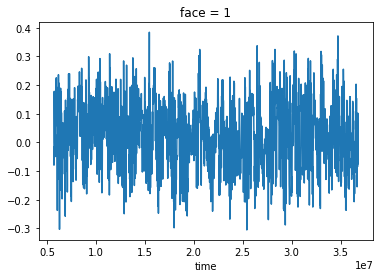

In [35]:
v_a.isel(i_g=slice(100,200),j=slice(100,200),face=1).mean(dim=['i_g','j']).plot()

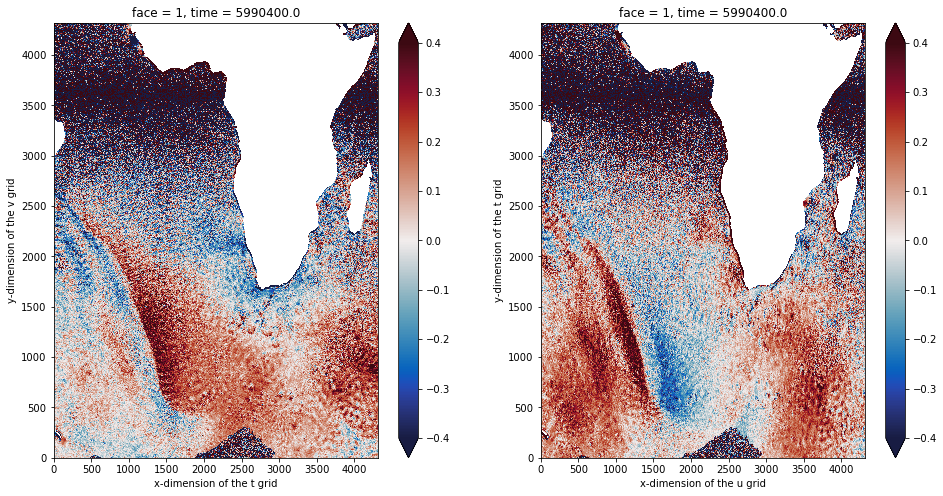

In [15]:
fig = plt.figure(figsize = (16,8))

plt.subplot(121)
u_a.isel(time=80).plot(vmin=-0.4, vmax=0.4, cmap = cm.balance)
plt.subplot(122)
v_a.isel(time=80).plot(vmin=-0.4, vmax=0.4, cmap = cm.balance)


In [16]:
uv_complex = gridx.interp(u_a,'Y') + 1j*gridx.interp(v_a,'X')
print(uv_complex)

<xarray.DataArray (j: 4320, i: 4320, time: 8640)>
dask.array<shape=(4320, 4320, 8640), dtype=complex64, chunksize=(187, 375, 960)>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07


In [20]:
time_chunk= 1440
ij_chunk = 432
uv_complex= uv_complex.chunk({'time': time_chunk, 'i': ij_chunk, 'j': ij_chunk})

print(uv_complex)

<xarray.DataArray (j: 4320, i: 4320, time: 8640)>
dask.array<shape=(4320, 4320, 8640), dtype=complex64, chunksize=(432, 432, 1440)>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07


In [22]:
uv_fft_complex = xrft.dft(uv_complex.fillna(0.), dim=['time'],shift=False,detrend=False,window=False,chunks_to_segments=True)
E_uv_segments = (uv_fft_complex*uv_fft_complex.conj()).where(uv_fft_complex!=0., drop=False)/time_chunk*3600
E_uv = E_uv_segments.mean(dim=['time_segment']) 
E_uv = np.real(E_uv).rename('E_uv')
print(E_uv)

<xarray.DataArray 'E_uv' (j: 4320, i: 4320, freq_time: 1440)>
dask.array<shape=(4320, 4320, 1440), dtype=float64, chunksize=(432, 432, 1440)>
Coordinates:
  * j                  (j) int64 0 1 2 3 4 5 6 ... 4314 4315 4316 4317 4318 4319
  * i                  (i) int64 0 1 2 3 4 5 6 ... 4314 4315 4316 4317 4318 4319
  * freq_time          (freq_time) float64 0.0 1.929e-07 ... -1.929e-07
    freq_time_spacing  float64 1.929e-07


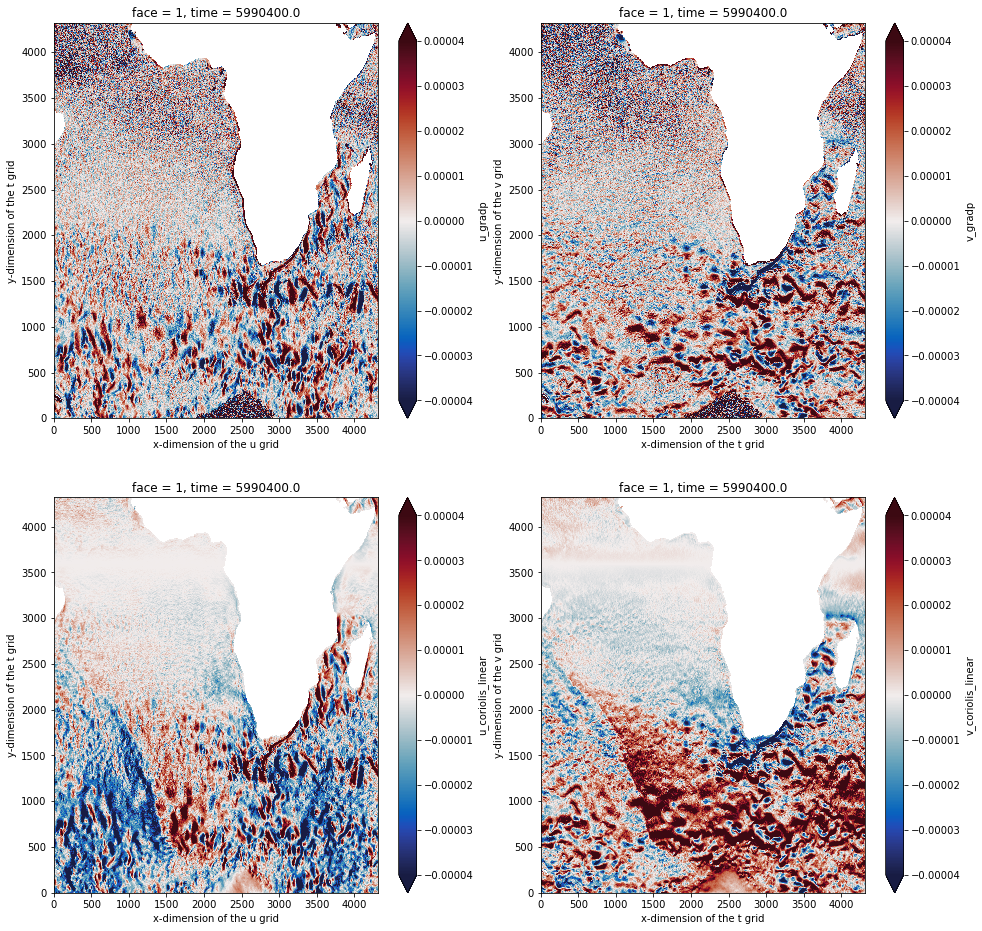

In [21]:
fig = plt.figure(figsize = (16,16))

plt.subplot(221)
ds_u_gradp['u_gradp'].isel(time=80).plot(vmin=-0.00004, vmax=0.00004, cmap = cm.balance) # g*d_eta/dx
plt.subplot(222)
ds_v_gradp['v_gradp'].isel(time=80).plot(vmin=-0.00004, vmax=0.00004, cmap = cm.balance) # g*d_eta/dy
plt.subplot(223)
ds_u_coriolis['u_coriolis_linear'].isel(time=80).plot(vmin=-0.00004, vmax=0.00004, cmap = cm.balance) # f*SSV
plt.subplot(224)
ds_v_coriolis['v_coriolis_linear'].isel(time=80).plot(vmin=-0.00004, vmax=0.00004, cmap = cm.balance) # -f*SSU

In [14]:
ug = ds_1['u_gradp']/f_j.isel(face=1)
print(ug)

<xarray.DataArray (time: 8640, j: 4320, i_g: 4320)>
dask.array<shape=(8640, 4320, 4320), dtype=float32, chunksize=(960, 188, 376)>
Coordinates:
    dxC      (j, i_g) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    dyG      (j, i_g) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    f_j      (j, i_g) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    face     int64 1
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07


In [15]:
vg = ds_2['v_gradp']/f_i.isel(face=1)
print(vg)

<xarray.DataArray (time: 8640, j_g: 4320, i: 4320)>
dask.array<shape=(8640, 4320, 4320), dtype=float32, chunksize=(960, 188, 376)>
Coordinates:
    dxG      (j_g, i) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    dyC      (j_g, i) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    f_i      (j_g, i) float32 dask.array<shape=(4320, 4320), chunksize=(188, 376)>
    face     int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.68e+07 3.68e+07


In [11]:
dsU = xr.open_zarr(root_data_dir+'zarr/%s.zarr'%('SSU'))
print(dsU)

<xarray.Dataset>
Dimensions:  (face: 13, i_g: 4320, j: 4320, time: 8785)
Coordinates:
    dtime    (time) datetime64[ns] dask.array<shape=(8785,), chunksize=(8785,)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    iters    (time) int64 dask.array<shape=(8785,), chunksize=(1,)>
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.732e+07 3.732e+07
Data variables:
    SSU      (time, face, j, i_g) float32 dask.array<shape=(8785, 13, 4320, 4320), chunksize=(1, 1, 4320, 4320)>


In [12]:
dsV = xr.open_zarr(root_data_dir+'zarr/%s.zarr'%('SSV'))
print(dsV)

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, j_g: 4320, time: 8785)
Coordinates:
    dtime    (time) datetime64[ns] dask.array<shape=(8785,), chunksize=(8785,)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    iters    (time) int64 dask.array<shape=(8785,), chunksize=(1,)>
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.732e+07 3.732e+07
Data variables:
    SSV      (time, face, j_g, i) float32 dask.array<shape=(8785, 13, 4320, 4320), chunksize=(1, 1, 4320, 4320)>


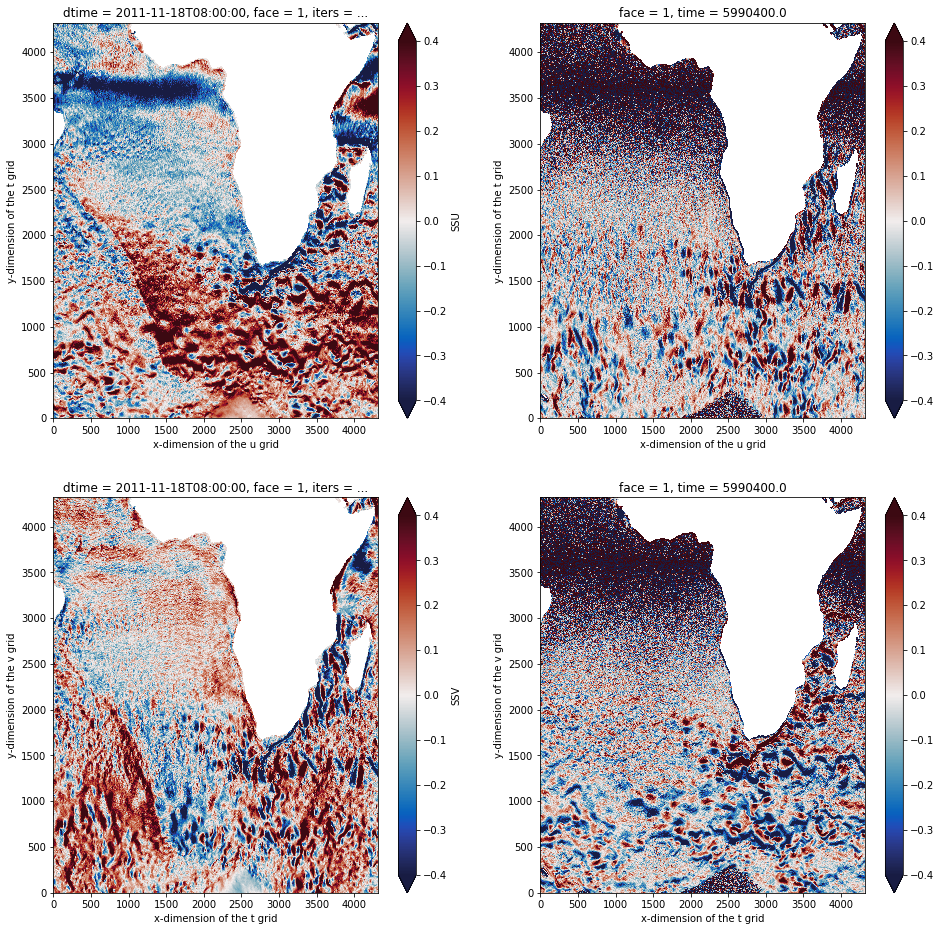

In [68]:
fig = plt.figure(figsize = (16,16))

plt.subplot(221)
dsU['SSU'].isel(time=80,face=1).plot(vmin=-0.4, vmax=0.4, cmap = cm.balance)
plt.subplot(222)
ug.isel(time=80).plot(vmin=-0.4, vmax=0.4, cmap = cm.balance)
plt.subplot(223)
dsV['SSV'].isel(time=80,face=1).plot(vmin=-0.4, vmax=0.4, cmap = cm.balance)
plt.subplot(224)
vg.isel(time=80).plot(vmin=-0.4, vmax=0.4, cmap = cm.balance)

In [13]:
cluster.close()